# Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings 
warnings.filterwarnings('ignore')

import os

In [3]:
df = pd.read_csv('https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/839/original/Jamboree_Admission.csv')
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


## Descriptive Stats

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [5]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [6]:
df.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [7]:
#Basic Data Manipulation

#Dropping the Serial No column as there is no relavent information

df.drop(columns=['Serial No.'], axis = 1, inplace=True)

In [8]:
#Removing extra space from each column
df.columns = df.columns.str.strip()

In [9]:
## Univariate Analysis

In [22]:
def plot_histogram(df):
    """ To Plot the histogram of the continuous feature"""
    print(df.describe())
    plt.figure(figsize=(10,6))
    plt.title(f'Datapoint distribution of {df.name}')
    sns.distplot(df,bins=30,kde=False,color='red')


def plot_countplot(df):
    """ To plot bargraph to get the count of each score feature"""
    print(df.describe())
    plt.figure(figsize=(10,6))
    plt.title(f'Datapoint distribution of {df.name}')
    sns.countplot(df)


def plot_boxplot(x,y):
    """ To plot boxplot to get the distribution between target variable and other feature"""
    plt.figure(figsize=(10,6))
    plt.title(f'Datapoint distribution between {x.name} and {y.name}')
    sns.boxplot(x,y)


def plot_scatter(x,y):
    """ To plot boxplot to get the distribution between target variable and other feature"""
    plt.figure(figsize=(10,6))
    plt.title(f'Datapoint distribution between {x.name} and {y.name}')
    sns.scatterplot(x,y,color='green')


def plot_heatmap(df):
    """To plot the correaltion matrix to understand which feature is more related to target variable"""
    plt.figure(figsize=(10,6))
    plt.title(f'Correlation Matrix')
    sns.heatmap(df.corr(),annot=True)



count    500.000000
mean     316.472000
std       11.295148
min      290.000000
25%      308.000000
50%      317.000000
75%      325.000000
max      340.000000
Name: GRE Score, dtype: float64


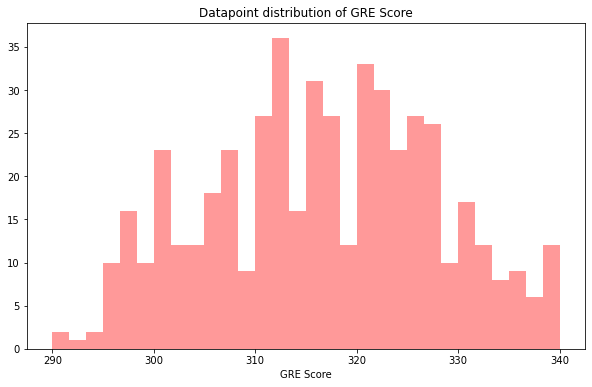

In [11]:
plot_histogram(df['GRE Score'])

count    500.000000
mean     107.192000
std        6.081868
min       92.000000
25%      103.000000
50%      107.000000
75%      112.000000
max      120.000000
Name: TOEFL Score, dtype: float64


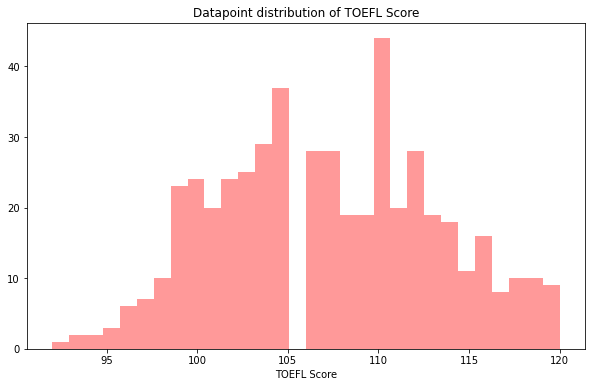

In [12]:
plot_histogram(df['TOEFL Score'])

count    500.000000
mean       3.114000
std        1.143512
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: University Rating, dtype: float64


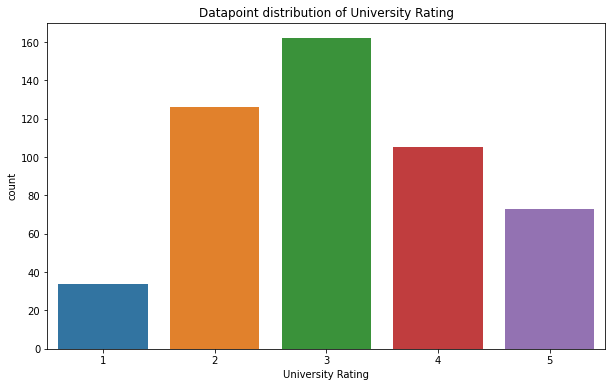

In [13]:
plot_countplot(df['University Rating'])

count    500.000000
mean       0.560000
std        0.496884
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: Research, dtype: float64


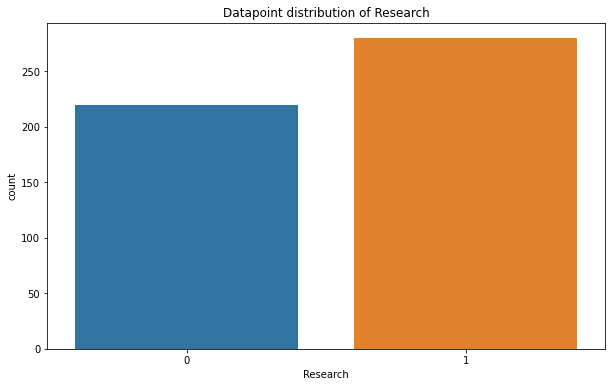

In [14]:
plot_countplot(df['Research'])

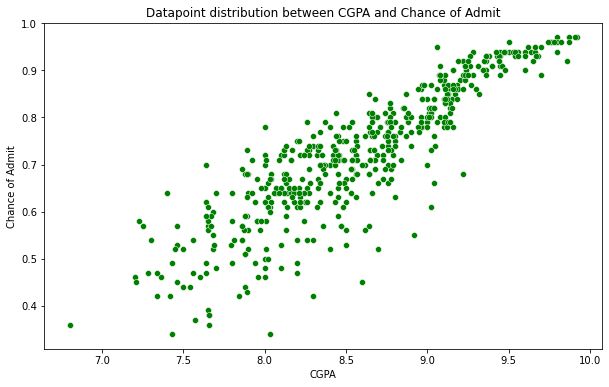

In [15]:
plot_scatter(x=df['CGPA'],y=df['Chance of Admit'])

##### It looks like with higher CGPA the chances of getting admitted is also high

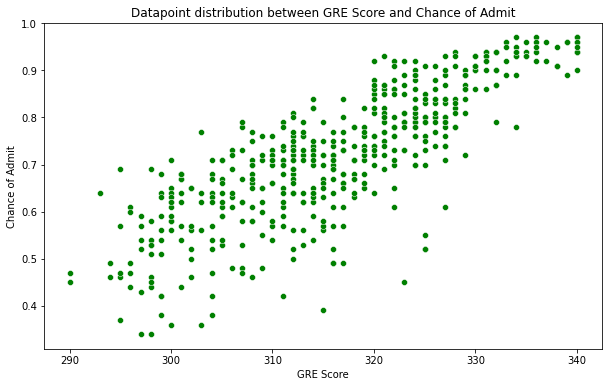

In [16]:
plot_scatter(x=df['GRE Score'],y=df['Chance of Admit'])

##### It looks like with higher GRE Score the chances of getting admitted is also high

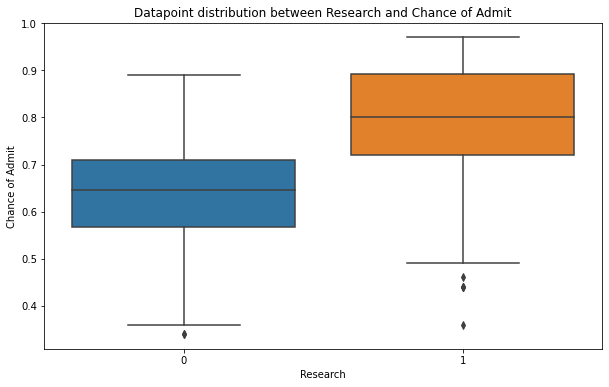

In [17]:
plot_boxplot(x=df['Research'], y=df['Chance of Admit'])

##### The mean value for chances of getting for reseach people is much higher as compared to non-research people

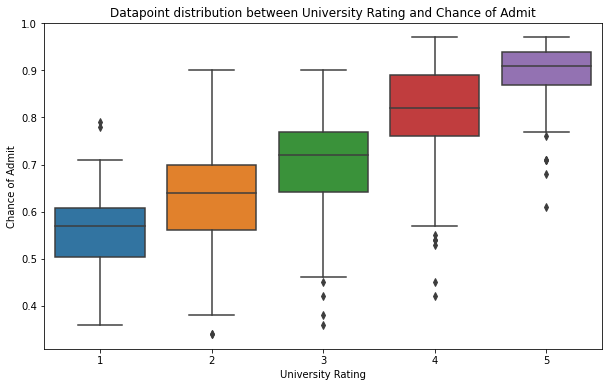

In [18]:
plot_boxplot(x=df['University Rating'], y=df['Chance of Admit'])

In [19]:
df['University Rating'].value_counts()

3    162
2    126
4    105
5     73
1     34
Name: University Rating, dtype: int64

##### The Chances of getting admission increases with university rating

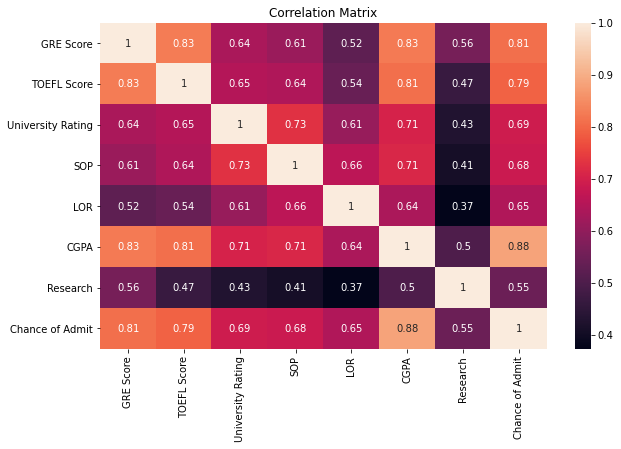

In [23]:
plot_heatmap(df)

In [21]:
skewness_array = []
for items in df[num_cols]:
    skewness_array.append([items,df[items].skew(),df[items].kurt()])


skew_df = pd.DataFrame(skewness_array,columns = ['Columns','Skewness','Kurtosis'])
skew_df

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [37]:
num_cols = []

for items in df.columns:
    if (df[items].dtypes == 'int64') or (df[items].dtypes == 'float64'):
        num_cols.append(items)

#Removing the target column
num_cols = num_cols[:-1]

print(num_cols)

['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA', 'Research']


In [24]:
# Model Building

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score